In [43]:
import sys
sys.path.append("..")

import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real, realcontour_nd, realcontour_1D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from gaussian import Gaussian

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
testfunction = Gaussian(2)


In [45]:
# init model
lamb = 1
delta = 0.6
Nstep = 150
dt_init = 8e-3
thresh =-8
tmax = dt_init*150

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_1D(10, (-0.5,0.5))
contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [46]:
plind.descend(delta, thresh, tmax, dt_init)

total steps: 12 current time: 1.2630147010682986


../plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


In [47]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral))

((0.0010127931764916153+3.131088395552255j), 4.163360902477974e-10)
3.141592653589793j
[1.00335483        inf]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [35]:
len(plind.contour.points)

11

In [36]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

IndexError: too many indices for array

<Figure size 432x288 with 0 Axes>

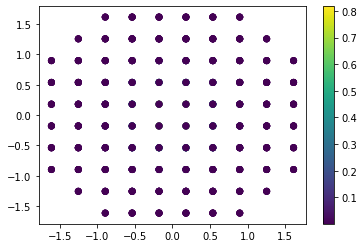

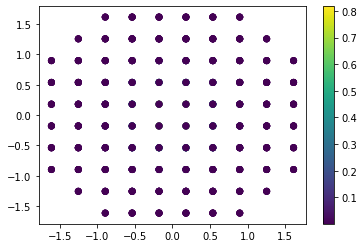

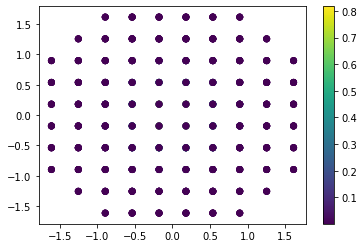

In [307]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
zs = np.real(plind.contour.points[:,2])

xs = np.imag(plind.contour.points[:,0])
ys = np.imag(plind.contour.points[:,1])
zs = np.imag(plind.contour.points[:,2])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, zs, c=intvals.real)
plt.colorbar()
plt.show()

plt.figure
plt.scatter(ys,zs,c=intvals.real)
plt.colorbar()
plt.show()